# Content analysis
## Set-up, clean-up

# TO DO
- Import data
- Write cleaning function, apply to every df
- Add circle.png as a mask for word cloud + use pyldavis layout&size to plot the topics together
- Make word cloud topic model for Chinese
- Prettify the frequency plot for most used tokens
- Make a pretty frequency plot of language distribution in data 

Inspired by: https://github.com/chuachinhon/twitter_state_trolls_cch


In [6]:
# import data
import pandas as pd
en_df = pd.read_csv('data/english_preprocessed_with_lemmas.csv')
#zh_df = pd.read_csv('data/chinese_preprocessed.csv')

In [7]:
en_df.head()

,id_str,created_at,user,verified,text,retweet_count,favorite_count,lang,follower_count,hashtags_bytwitter,tokens,text_clean,text_lemmatized,n_sent,token,lemma,upos,xpos,dependency relation,ner
0,1262699470946516992,2020-05-19 10:59:48,ChinaEUMission,1,All parties have reached consensus on a draft ...,0,0,en,14658,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",all parties have reached consensus on a draft ...,all party have reach consensus on a draft reso...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'All', 1: 'parties', 2: 'have', 3: 'reache...","{0: 'all', 1: 'party', 2: 'have', 3: 'reach', ...","{0: 'DET', 1: 'NOUN', 2: 'AUX', 3: 'VERB', 4: ...","{0: 'DT', 1: 'NNS', 2: 'VBP', 3: 'VBN', 4: 'NN...","{0: 'det', 1: 'nsubj', 2: 'aux', 3: 'root', 4:...","{0: None, 1: None, 2: None, 3: None, 4: None, ..."
1,1262705175489363968,2020-05-19 11:22:28,ChinaEUMission,1,China's railway system is expected to reach 14...,0,0,en,14659,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",china s railway system is expected to reach 14...,China 's railway system be expect to reach 146...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'China', 1: ""'s"", 2: 'railway', 3: 'system...","{0: 'China', 1: ""'s"", 2: 'railway', 3: 'system...","{0: 'PROPN', 1: 'PART', 2: 'NOUN', 3: 'NOUN', ...","{0: 'NNP', 1: 'POS', 2: 'NN', 3: 'NN', 4: 'VBZ...","{0: 'nmod:poss', 1: 'case', 2: 'compound', 3: ...","{0: 'GPE', 1: None, 2: None, 3: None, 4: None,..."
2,1262747333747343366,2020-05-19 14:09:59,ChinaEUMission,1,China has exported over 50 billion masks since...,0,0,en,14665,StrongerTogether,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",china has exported over 50 billion masks since...,China have export over 50 billion mask since M...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'China', 1: 'has', 2: 'exported', 3: 'over...","{0: 'China', 1: 'have', 2: 'export', 3: 'over'...","{0: 'PROPN', 1: 'AUX', 2: 'VERB', 3: 'ADV', 4:...","{0: 'NNP', 1: 'VBZ', 2: 'VBN', 3: 'RB', 4: 'CD...","{0: 'nsubj', 1: 'aux', 2: 'root', 3: 'advmod',...","{0: 'GPE', 1: None, 2: None, 3: None, 4: 'CARD..."
3,1262753525655719938,2020-05-19 14:34:35,zlj517,1,RT @SpokespersonCHN: Not the first time to bas...,0,0,en,621491,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",rt spokespersonchn not the first time to bas...,rt @spokespersonchn : not the first time to ba...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'RT', 1: '@SpokespersonCHN', 2: ':', 3: 'N...","{0: 'rt', 1: '@spokespersonchn', 2: ':', 3: 'n...","{0: 'NOUN', 1: 'NOUN', 2: 'PUNCT', 3: 'PART', ...","{0: 'NN', 1: 'NN', 2: ':', 3: 'RB', 4: 'DT', 5...","{0: 'compound', 1: 'root', 2: 'punct', 3: 'adv...","{0: None, 1: 'TWITTER_USER', 2: None, 3: None,..."
4,1262753542101581830,2020-05-19 14:34:39,zlj517,1,RT @SpokespersonCHN: That what does not kill y...,0,0,en,621491,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",rt spokespersonchn that what does not kill y...,rt @spokespersonchn : that what do not kill yo...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'RT', 1: '@SpokespersonCHN', 2: ':', 3: 'T...","{0: 'rt', 1: '@spokespersonchn', 2: ':', 3: 't...","{0: 'NOUN', 1: 'NOUN', 2: 'PUNCT', 3: 'SCONJ',...","{0: 'NN', 1: 'NN', 2: ':', 3: 'IN', 4: 'WP', 5...","{0: 'compound', 1: 'root', 2: 'punct', 3: 'mar...","{0: None, 1: 'TWITTER_USER', 2: None, 3: None,..."


In [ ]:
# seeing who posts the most
ax = sns.countplot(x="user", data=en_df).set_title('User Distribution')


In [8]:
# setting up matplotlib settings
# Source: https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.font_manager as font_manager

# font
font_dirs = ['/Library/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DIN Condensed Bold'

# set matplotlib aesthetics
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

sns.set(rc={
            'axes.axisbelow': False,
            'axes.edgecolor': 'lightgrey',
            'axes.facecolor': 'None',
            'axes.grid': False,
            'axes.labelcolor': 'dimgrey',
            'axes.spines.right': False,
            'axes.spines.top': False,
            'figure.facecolor': 'white',
            'lines.solid_capstyle': 'round',
            'patch.edgecolor': 'w',
            'patch.force_edgecolor': True,
            'text.color': 'dimgrey',
            'xtick.bottom': False,
            'xtick.color': 'dimgrey',
            'xtick.direction': 'out',
            'xtick.top': False,
            'ytick.color': 'dimgrey',
            'ytick.direction': 'out',
            'ytick.left': False,
            'ytick.right': False})

sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

## Visualisations
### Frequent terms
#### English

/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/yellowbrick/base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


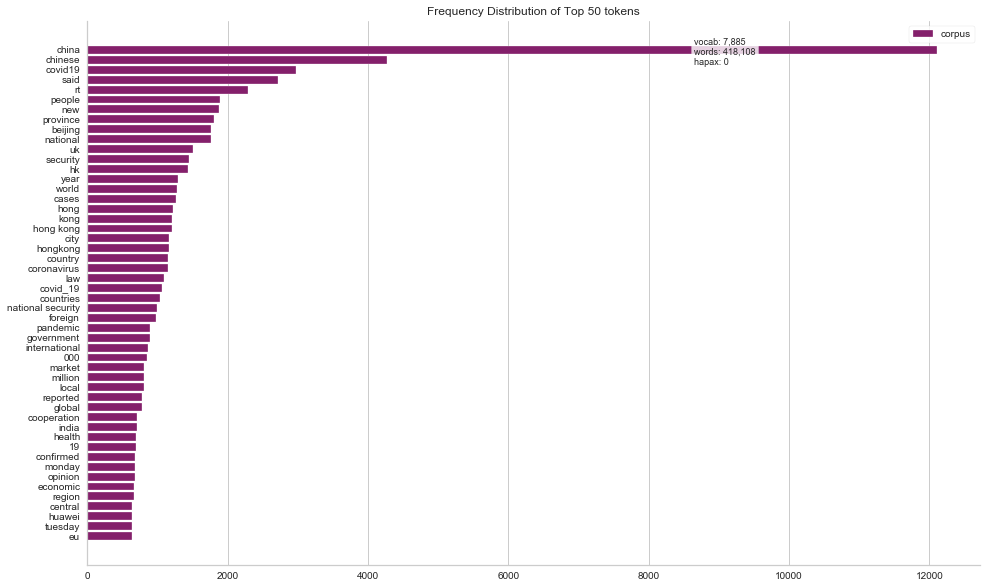

In [9]:
# Visualize frequent terms
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer
from palettable.matplotlib import Inferno_20


# clean text
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(en_df['text_clean'].dropna())
features = vect.get_feature_names()

plt.figure(figsize=(16,10))
visualiser = FreqDistVisualizer(features=features, show = False, color='#84206b')
visualiser.fit(docs)

visualiser.poof('plots/english/top50.png')
#visualiser.poof()

#plt.show()
#plt.savefig('plots/english/top50.png')

#### Chinese

You should consider upgrading via the '/Users/anitakurm/anaconda3/envs/text_to_x/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/yellowbrick/base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20896 missing fro

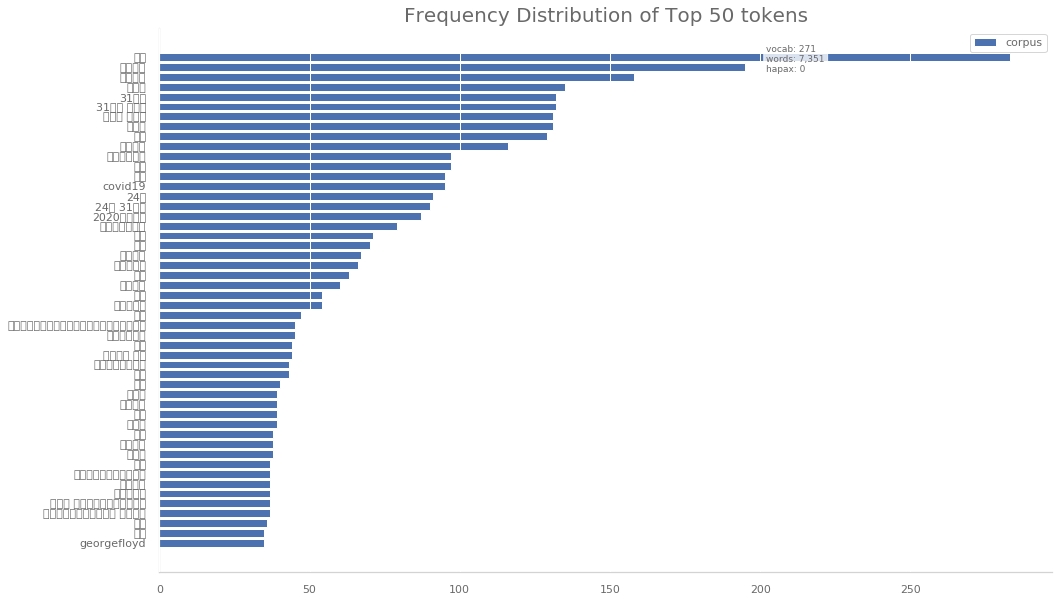

In [46]:
# Visualize frequent terms
import jieba
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer

# change font to chinese
font_dirs = ['/Library/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'Noto Sans SC'

# clean text
vect = CountVectorizer(min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(zh_df['text_clean'].dropna())
features = vect.get_feature_names()

plt.figure(figsize=(16,10))
visualiser = FreqDistVisualizer(features=features, show = False)
visualiser.fit(docs)

visualiser.poof('plots/chinese/top50.png')

## Topic modelling

### English

In [10]:
# pyLDAvis
import gensim
import pyLDAvis.gensim
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models, similarities


stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join([ch for ch in stop_free if ch not in exclude])
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


# some additional pre-processing is needed
sample_text = en_df['text_clean']
state_text = list(sample_text.values)

text_clean = [clean(doc).split() for doc in state_text]
dictionary = corpora.Dictionary(text_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_clean]

In [41]:
# I'm keeping the number of topics small so that they would be easier to discern
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = 8, id2word = dictionary, passes=150, random_state=3)

In [47]:
tfidf = models.TfidfModel(doc_term_matrix)
doc_tfidf = tfidf[doc_term_matrix]
doc_lda = ldamodel[doc_tfidf]

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(ldamodel, doc_lda, dictionary, mds='tsne', sort_topics=True)


In [48]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2     -108.958252 -208.941483       1        1  25.978283
7      186.487061  -98.103249       2        1  21.618986
5       19.245832  160.858780       3        1  20.889360
1      170.658829   75.445076       4        1   6.307805
6       -1.386411  -35.043739       5        1   6.306727
3     -145.800095  106.944611       6        1   6.299615
0       64.834541 -221.825272       7        1   6.299615
4     -196.906036  -58.990913       8        1   6.299608, topic_info=          Term        Freq       Total Category  logprob  loglift
29       china  432.000000  432.000000  Default  30.0000  30.0000
152    covid19  198.000000  198.000000  Default  29.0000  29.0000
96           u  186.000000  186.000000  Default  28.0000  28.0000
275         hk  157.000000  157.000000  Default  27.0000  27.0000
281   security  149.000000  149.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
78       first    8.720399   40.737976   Topic8  -5.0317   1.2232
200    chinese   11.331612  179.758453   Topic8  -4.7698   0.0007
96           u    7.448544  186.207550   Topic8  -5.1894  -0.4542
702        day    6.603853   43.539349   Topic8  -5.3098   0.8787
1022    market    6.396834   39.138451   Topic8  -5.3416   0.9534

[443 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
811       8  0.850125         0
6964      6  0.960757        00
24        3  0.278544       000
24        5  0.185696       000
24        8  0.557087       000
...     ...       ...       ...
50        8  0.377498      year
2311      2  1.013519        yi
760       8  1.037678      yuan
2457      4  1.011301  zhejiang
3879      1  0.968117        香港

[627 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 6, 2, 7, 4, 1, 5])

In [51]:
#save 
pyLDAvis.save_html(panel, 'plots/english/8_topics_english_sorted.html')

In [49]:
print(panel.topic_order)
#print(panel2.topic_order)

[3, 8, 6, 2, 7, 4, 1, 5]


### Coherence scores, hyperparameter tuning and evaluation

In [56]:
# Create Dictionary
id2word = dictionary
# Create Corpus
texts = text_clean
# Term Document Frequency
corpus = doc_term_matrix

In [60]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text_clean, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [61]:
# code from https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0 

import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  1%|          | 3/540 [02:47<8:28:34, 56.82s/it]Process ForkPoolWorker-57:
Process ForkPoolWorker-59:
Process ForkPoolWorker-58:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/anitakurm/anaconda3/envs/text_to_x/lib/pytho

KeyboardInterrupt: 

#### Word clouds

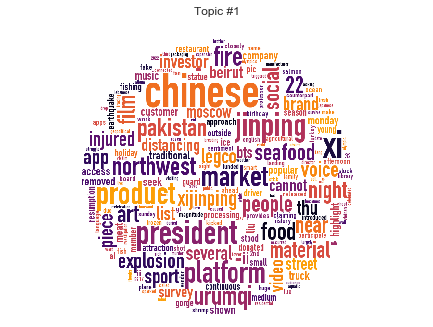

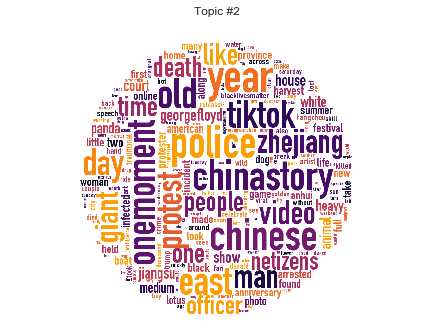

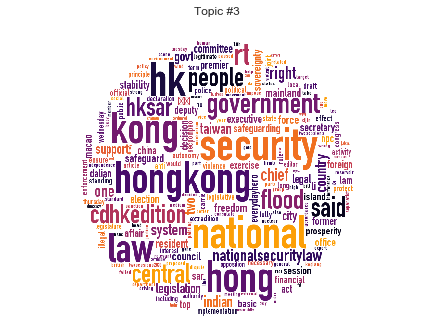

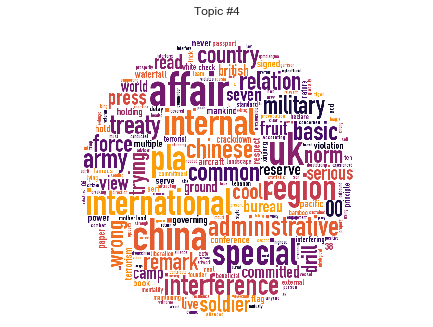

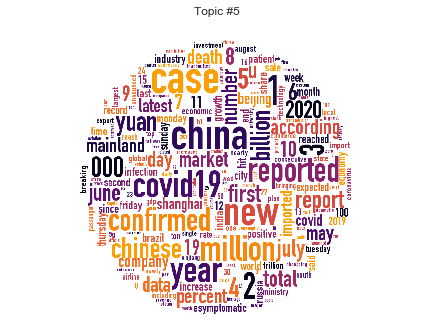

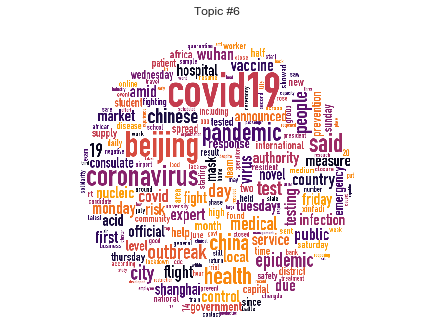

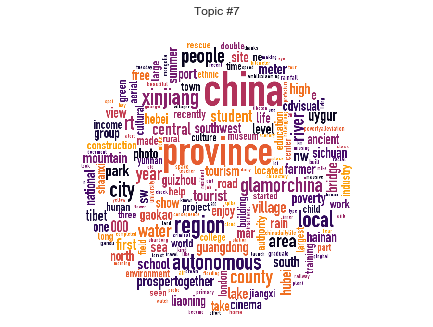

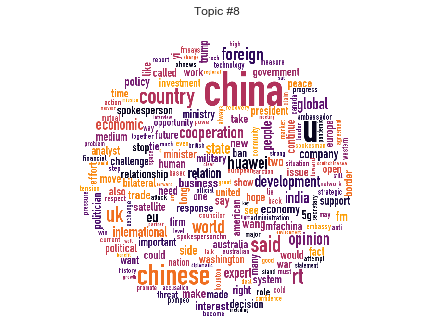

In [52]:
# lda is assumed to be the variable holding the LdaModel object
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from palettable.lightbartlein.diverging import BlueDarkOrange18_5
from palettable.matplotlib import Inferno_20
import random
from PIL import Image
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Inferno_20.colors[random.randint(1,15)])

font_path = "/Library/Fonts/DIN Condensed Bold.ttf"
icon_path = "utils/circle.png"

mask = np.array(Image.open(icon_path))

for t in range(ldamodel.num_topics):
    plt.figure()
    # wordcloud = WordCloud(background_color="white", max_font_size=60, width=800, height=400)
    wc = WordCloud(font_path=font_path, background_color="white", max_words=200, mask = mask,
               stopwords=STOPWORDS,
               max_font_size=100, random_state=42,
                  width=800, height=400)
    plt.imshow(wc.fit_words(dict(ldamodel.show_topic(t, 200))).recolor(color_func=color_func, random_state=3))
    #wc.recolor(color_func=color_func)
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    #plt.show()
    plt.savefig(f"plots/english/en_wordcloud_topic_{t+1}.png", dpi = 400)
    


### Chinese

See here for word cloud in chinese: https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html

## Drafts
### Cluster analysis

NB!! Change to clean text variables; Change HDBScan parameters!

In [ ]:
# general prep
real_clean = en_df['text']
corpus_clean = list(real_clean.values)
tfidf = TfidfVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
docs_clean = tfidf.fit_transform(corpus_clean)

In [ ]:
# K-Means
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=10)
clusters.fit(docs_clean)
plt.figure(figsize=(16,10))
tsne = TSNEVisualizer()
tsne.fit(docs_clean, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()
plt.show()


In [ ]:
# HDBScan
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(docs_clean)
plt.figure(figsize=(16,10))
tsne = TSNEVisualizer()
tsne.fit(docs_clean, ["c{}".format(c) for c in clusterer.labels_])
tsne.poof()
plt.show()